In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from skopt import BayesSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
import matplotlib as mpl
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

In [27]:
df = pd.read_csv('C:/ProgramData/jupeter/basic/data/project/p_lungcancer_all_add2.csv')
df2 = df.copy()

In [28]:
df.Stage.value_counts()

Stage
Stage 4     7151
Stage 1     3338
Stage 3     2717
Stage 2     1743
Stage 3       48
Stage 0        3
Name: count, dtype: int64

In [29]:
'''
def encode_T_stage(row):
    if row['TX'] == 1:
        return 0  # 종양 발견 불가
    elif row['T0'] == 1:
        return 1  # 종양 없음
    elif row['T1a'] == 1:
        return 2  # T1a
    elif row['T1b'] == 1:
        return 3  # T1b
    elif row['T1c'] == 1:
        return 4  # T1c
    elif row['T2a'] == 1:
        return 5  # T2a
    elif row['T2b'] == 1:
        return 6  # T2b
    elif row['T3'] == 1:
        return 7  # T3
    elif row['T4'] == 1:
        return 8  # T4
    return 0  # Default 값

# 새 컬럼 생성
df['T_stage'] = df.apply(encode_T_stage, axis=1)
'''

"\ndef encode_T_stage(row):\n    if row['TX'] == 1:\n        return 0  # 종양 발견 불가\n    elif row['T0'] == 1:\n        return 1  # 종양 없음\n    elif row['T1a'] == 1:\n        return 2  # T1a\n    elif row['T1b'] == 1:\n        return 3  # T1b\n    elif row['T1c'] == 1:\n        return 4  # T1c\n    elif row['T2a'] == 1:\n        return 5  # T2a\n    elif row['T2b'] == 1:\n        return 6  # T2b\n    elif row['T3'] == 1:\n        return 7  # T3\n    elif row['T4'] == 1:\n        return 8  # T4\n    return 0  # Default 값\n\n# 새 컬럼 생성\ndf['T_stage'] = df.apply(encode_T_stage, axis=1)\n"

In [30]:
'''
# N단계 인코딩 함수
def encode_N_stage(row):
    if row['N1'] == 1:
        return 1  # N1: 동측 폐문 또는 폐 내부 림프절 전이
    elif row['N2'] == 1:
        return 2  # N2: 동측 종격림프절 전이
    elif row['N3'] == 1:
        return 3  # N3: 반대측 림프절 전이
    return 0  # N0: 림프절 전이 없음

# 새 N_stage 컬럼 생성
df['N_stage'] = df.apply(encode_N_stage, axis=1)
'''

"\n# N단계 인코딩 함수\ndef encode_N_stage(row):\n    if row['N1'] == 1:\n        return 1  # N1: 동측 폐문 또는 폐 내부 림프절 전이\n    elif row['N2'] == 1:\n        return 2  # N2: 동측 종격림프절 전이\n    elif row['N3'] == 1:\n        return 3  # N3: 반대측 림프절 전이\n    return 0  # N0: 림프절 전이 없음\n\n# 새 N_stage 컬럼 생성\ndf['N_stage'] = df.apply(encode_N_stage, axis=1)\n"

In [31]:
'''
# M단계 인코딩 함수
def encode_M_stage(row):
    if row['M1a'] == 1:
        return 1  # M1a: 흉막, 심낭 전이 또는 반대측 폐 전이
    elif row['M1b'] == 1:
        return 2  # M1b: 단일 원격 장기 전이
    elif row['M1c'] == 1:
        return 3  # M1c: 다수의 원격 장기 전이
    return 0  # M0: 원격 전이 없음

# 새 M_stage 컬럼 생성
df['M_stage'] = df.apply(encode_M_stage, axis=1)
'''

"\n# M단계 인코딩 함수\ndef encode_M_stage(row):\n    if row['M1a'] == 1:\n        return 1  # M1a: 흉막, 심낭 전이 또는 반대측 폐 전이\n    elif row['M1b'] == 1:\n        return 2  # M1b: 단일 원격 장기 전이\n    elif row['M1c'] == 1:\n        return 3  # M1c: 다수의 원격 장기 전이\n    return 0  # M0: 원격 전이 없음\n\n# 새 M_stage 컬럼 생성\ndf['M_stage'] = df.apply(encode_M_stage, axis=1)\n"

In [32]:
df['BMI'] = df['Weight'] / (df['Height'] / 100) ** 2

In [33]:
df.head()

,AGE,Stage,Tumor_Size,lymph_node_meta_size,Adenocarcinoma,Large_cell_carcinoma,Squamous_cell_carcinoma,TX,T0,T1,...,Death,Survival_period,EGFR_0,EGFR_1,EGFR_99,Drink_1,Drink_2,Drink_3,Drink_99,BMI
0,72,Stage 1,0.0,0.0,1,1,0,1,0,0,...,0,157,False,False,True,False,False,False,True,33.822654
1,66,Stage 4,2.0,4.5,1,0,0,0,0,1,...,0,567,False,False,True,False,False,False,True,18.984376
2,75,Stage 4,0.0,0.0,1,1,0,1,0,0,...,0,253,False,False,True,False,False,True,False,25.596524
3,77,Stage 4,2.0,8.0,1,0,1,0,0,1,...,0,266,False,True,False,False,True,False,False,31.486033
4,85,Stage 1,2.5,0.0,1,0,0,0,0,0,...,0,470,False,False,True,False,True,False,False,14.922211


In [34]:
#T0는 종양이 존재하지 않음을 의미. 즉, 종양이 없다는 정보이기 때문에 다른 T 값들과 합산하면 의미가 왜곡될 우려 있음.
#TX는 종양의 크기를 정확하게 알 수 없다는 의미, 사실상 정보가 없다고 볼 수 있음. 
# 따라서 TX를 다른 T 값들과 합산하면 제대로 된 의미를 갖지 못함.
# T0와 TX는 제외하고 T1~T4 값만 합산
df['T_sum'] = df[['T1', 'T1a', 'T1b', 'T1c', 'T2', 'T2a', 'T2b', 'T3', 'T4']].sum(axis=1)

In [35]:
# 각 T 항목에 대해 원하는 가중치 곱하기
df['T_weighted_sum'] = (df['T1'] * 2 +
                        df['T1a'] * 0.5 +
                        df['T1b'] * 1.5 +
                        df['T1c'] * 2.5 +
                        df['T2'] * 4 +
                        df['T2a'] * 3.5 +
                        df['T2b'] * 4.5 +
                        df['T3'] * 6 +
                        df['T4'] * 8.5)

In [36]:
# 각 N 항목에 대해 원하는 가중치 곱하기 (2, 4.5, 8)
df['N_weighted_sum'] = (df['N1'] * 2 +
                        df['N2'] * 4.5 +
                        df['N3'] * 8)

In [37]:
# N 항목 합산하기
df['N_sum'] = df['N1'] + df['N2'] + df['N3']

In [38]:
# M 항목 합산하기
df['M_sum'] = df['M1a'] + df['M1b'] + df['M1c']

In [39]:
df.head()

,AGE,Stage,Tumor_Size,lymph_node_meta_size,Adenocarcinoma,Large_cell_carcinoma,Squamous_cell_carcinoma,TX,T0,T1,...,Drink_1,Drink_2,Drink_3,Drink_99,BMI,T_sum,T_weighted_sum,N_weighted_sum,N_sum,M_sum
0,72,Stage 1,0.0,0.0,1,1,0,1,0,0,...,False,False,False,True,33.822654,0,0.0,0.0,0,0
1,66,Stage 4,2.0,4.5,1,0,0,0,0,1,...,False,False,False,True,18.984376,1,2.0,4.5,1,1
2,75,Stage 4,0.0,0.0,1,1,0,1,0,0,...,False,False,True,False,25.596524,0,0.0,0.0,0,1
3,77,Stage 4,2.0,8.0,1,0,1,0,0,1,...,False,True,False,False,31.486033,1,2.0,10.0,2,1
4,85,Stage 1,2.5,0.0,1,0,0,0,0,0,...,False,True,False,False,14.922211,1,2.5,0.0,0,0


In [40]:
df['Stage'] = df['Stage'].str.strip()

In [41]:
from sklearn.preprocessing import OrdinalEncoder

# 'stage' 컬럼에 대해 순서 지정 (1기 → 4기)
stage_order = [['Stage 0','Stage 1', 'Stage 2', 'Stage 3', 'Stage 4']]

# OrdinalEncoder 객체 생성 및 적용
encoder = OrdinalEncoder(categories=stage_order)
df['Stage'] = encoder.fit_transform(df[['Stage']])

In [42]:
df.head()

,AGE,Stage,Tumor_Size,lymph_node_meta_size,Adenocarcinoma,Large_cell_carcinoma,Squamous_cell_carcinoma,TX,T0,T1,...,Drink_1,Drink_2,Drink_3,Drink_99,BMI,T_sum,T_weighted_sum,N_weighted_sum,N_sum,M_sum
0,72,1.0,0.0,0.0,1,1,0,1,0,0,...,False,False,False,True,33.822654,0,0.0,0.0,0,0
1,66,4.0,2.0,4.5,1,0,0,0,0,1,...,False,False,False,True,18.984376,1,2.0,4.5,1,1
2,75,4.0,0.0,0.0,1,1,0,1,0,0,...,False,False,True,False,25.596524,0,0.0,0.0,0,1
3,77,4.0,2.0,8.0,1,0,1,0,0,1,...,False,True,False,False,31.486033,1,2.0,10.0,2,1
4,85,1.0,2.5,0.0,1,0,0,0,0,0,...,False,True,False,False,14.922211,1,2.5,0.0,0,0


In [43]:
# df = pd.get_dummies(data = df, columns=['Smoke'], drop_first=True)

In [44]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['Tumor_Size', 'lymph_node_meta_size','Height','Weight','FEV1_FVC_P',
        'DLCO_VA_P','AGE','Survival_period','BMI', 
        'T_sum','N_sum','M_sum','T_weighted_sum','N_weighted_sum']] = scaler.fit_transform(df[['Tumor_Size', 'lymph_node_meta_size','Height','Weight',
                           'FEV1_FVC_P','DLCO_VA_P','AGE','Survival_period','BMI',
                          'T_sum','N_sum','M_sum',
                           'T_weighted_sum','N_weighted_sum']])

In [45]:
df.columns

Index(['AGE', 'Stage', 'Tumor_Size', 'lymph_node_meta_size', 'Adenocarcinoma',
       'Large_cell_carcinoma', 'Squamous_cell_carcinoma', 'TX', 'T0', 'T1',
       'T1a', 'T1b', 'T1c', 'T2', 'T2a', 'T2b', 'T3', 'T4', 'N0', 'N1', 'N2',
       'N3', 'M0', 'M1a', 'M1b', 'M1c', 'Smoke', 'Height', 'Weight',
       'FEV1_FVC_P', 'DLCO_VA_P', 'Operation', 'Chemotherapy',
       'Radiation_Therapy', 'Death', 'Survival_period', 'EGFR_0', 'EGFR_1',
       'EGFR_99', 'Drink_1', 'Drink_2', 'Drink_3', 'Drink_99', 'BMI', 'T_sum',
       'T_weighted_sum', 'N_weighted_sum', 'N_sum', 'M_sum'],
      dtype='object')

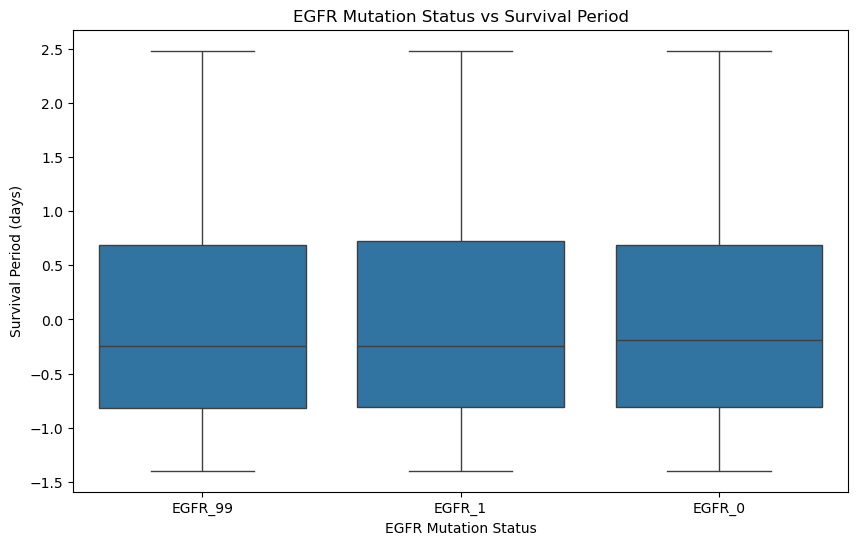

In [46]:
# EGFR 돌연변이 상태와 생존 기간 간의 관계 분석
# EGFR 돌연변이 열: EGFR_0, EGFR_1, EGFR_99
# 해석하기 쉬운 형태로 EGFR 돌연변이 상태를 나타내는 새로운 열 생성

# EGFR 돌연변이 열들을 하나의 'EGFR_status' 열로 매핑
def encode_egfr(row):
    if row['EGFR_1']:
        return 'EGFR_1' # EGFR_1 돌연변이가 있는 경우
    elif row['EGFR_0']:
        return 'EGFR_0' # EGFR_0 돌연변이가 있는 경우
    else:
        return 'EGFR_99' # 돌연변이 정보가 없는 경우

df['EGFR_status'] = df.apply(encode_egfr, axis=1)

# EGFR 돌연변이 상태에 따른 생존 기간 시각화
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='EGFR_status', y='Survival_period')
plt.title('EGFR Mutation Status vs Survival Period')
plt.xlabel('EGFR Mutation Status')
plt.ylabel('Survival Period (days)')
plt.show()

In [47]:
# Filtering the data to show patients with EGFR_1 mutation
egfr_1_patients = df[df['EGFR_status'] == 'EGFR_1']

egfr_1_patients

,AGE,Stage,Tumor_Size,lymph_node_meta_size,Adenocarcinoma,Large_cell_carcinoma,Squamous_cell_carcinoma,TX,T0,T1,...,Drink_2,Drink_3,Drink_99,BMI,T_sum,T_weighted_sum,N_weighted_sum,N_sum,M_sum,EGFR_status
3,0.980921,4.0,-0.095256,2.012420,1,0,1,0,0,1,...,True,False,False,1.173047,0.558768,-0.094582,2.630151,2.726603,1.047668,EGFR_1
7,0.706296,2.0,0.735456,-0.829312,1,0,1,0,0,0,...,True,False,False,0.458692,0.558768,0.736174,-0.817569,-1.022336,-0.954501,EGFR_1
11,0.294360,0.0,-0.925967,-0.829312,1,0,0,0,0,0,...,True,False,False,2.119396,-1.789653,-0.925337,-0.817569,-1.022336,-0.954501,EGFR_1
15,0.500328,2.0,0.527778,-0.118879,1,1,0,0,0,0,...,True,False,False,1.154189,0.558768,0.528485,-0.128025,0.852134,-0.954501,EGFR_1
16,0.225704,4.0,-0.925967,-0.829312,1,0,1,1,0,0,...,False,False,True,-0.808997,-1.789653,-0.925337,-0.817569,-1.022336,1.047668,EGFR_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14987,-0.666824,4.0,2.604558,-0.118879,1,0,1,1,0,0,...,False,False,False,-0.952085,0.558768,2.605374,-0.128025,0.852134,1.047668,EGFR_1
14988,0.774952,4.0,2.604558,-0.829312,0,0,0,1,0,0,...,False,False,False,1.354087,0.558768,2.605374,-0.817569,-1.022336,1.047668,EGFR_1
14992,1.049577,3.0,-0.302934,2.012420,1,1,0,0,0,0,...,True,False,False,0.205255,0.558768,-0.302270,1.940607,0.852134,-0.954501,EGFR_1
14993,1.324201,3.0,-0.095256,0.769162,1,0,0,0,0,1,...,False,False,True,-0.471429,0.558768,-0.094582,0.733905,0.852134,-0.954501,EGFR_1


In [48]:
# Filtering the data to show patients with EGFR_1 mutation who are also smokers
# Assuming 'Smoke' column indicates smoking status (1 or greater indicates a smoker)
egfr_1_smokers = egfr_1_patients[egfr_1_patients['Smoke'] == 1]


egfr_1_smokers

,AGE,Stage,Tumor_Size,lymph_node_meta_size,Adenocarcinoma,Large_cell_carcinoma,Squamous_cell_carcinoma,TX,T0,T1,...,Drink_2,Drink_3,Drink_99,BMI,T_sum,T_weighted_sum,N_weighted_sum,N_sum,M_sum,EGFR_status
105,-0.460856,2.0,-0.925967,-0.118879,1,0,1,1,0,0,...,False,False,False,0.690476,-1.789653,-0.925337,-0.128025,0.852134,-0.954501,EGFR_1
145,-0.872792,4.0,-0.095256,0.769162,1,0,0,0,0,1,...,False,False,True,0.392386,0.558768,-0.094582,0.733905,0.852134,1.047668,EGFR_1
303,-0.598168,4.0,-0.925967,2.012420,1,0,0,1,0,0,...,False,True,False,-0.264002,-1.789653,-0.925337,1.940607,0.852134,1.047668,EGFR_1
409,0.431672,1.0,0.112422,-0.829312,1,0,1,0,0,0,...,False,False,False,-0.253094,0.558768,0.113107,-0.817569,-1.022336,-0.954501,EGFR_1
426,0.568984,4.0,-0.925967,-0.829312,1,0,1,1,0,0,...,False,False,True,2.048559,-1.789653,-0.925337,-0.817569,-1.022336,1.047668,EGFR_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14915,-2.177256,4.0,-0.718289,-0.118879,1,0,0,0,0,0,...,True,False,False,-0.363499,0.558768,-0.717648,-0.128025,0.852134,1.047668,EGFR_1
14918,-1.628008,4.0,-0.302934,-0.118879,1,0,0,0,0,0,...,True,False,False,-0.880898,0.558768,-0.302270,-0.128025,0.852134,1.047668,EGFR_1
14934,-0.598168,4.0,-0.925967,-0.118879,1,0,1,1,0,0,...,False,False,False,-0.431026,-1.789653,-0.925337,-0.128025,0.852134,1.047668,EGFR_1
14951,1.118233,4.0,-0.095256,0.769162,1,0,1,0,0,1,...,False,False,False,0.516736,0.558768,-0.094582,0.733905,0.852134,1.047668,EGFR_1


In [49]:
# Calculating the proportion of smokers and non-smokers among patients with EGFR_1 mutation
smokers_count = egfr_1_patients[egfr_1_patients['Smoke'] > 0].shape[0]
non_smokers_count = egfr_1_patients[egfr_1_patients['Smoke'] == 0].shape[0]
total_egfr_1_patients = egfr_1_patients.shape[0]

smokers_ratio = smokers_count / total_egfr_1_patients * 100
non_smokers_ratio = non_smokers_count / total_egfr_1_patients * 100

smokers_ratio, non_smokers_ratio


(73.59829666430092, 26.40170333569908)

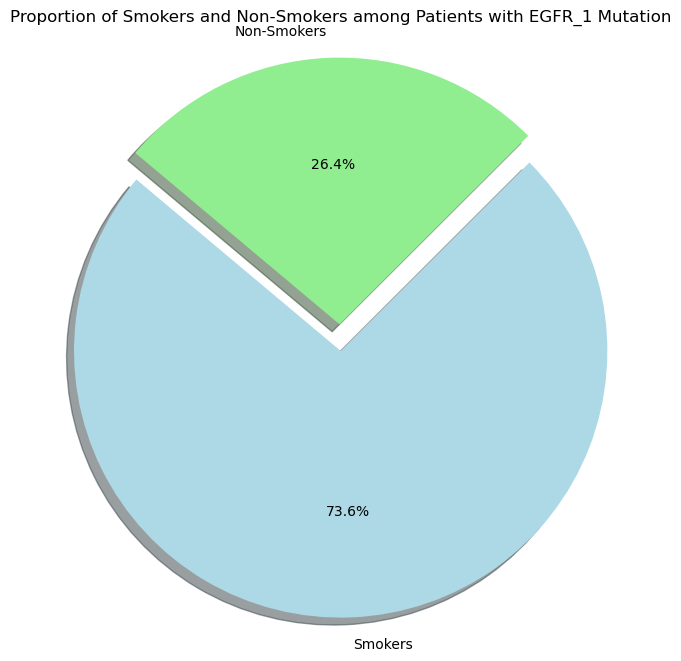

In [50]:
# EGFR_1 돌연변이를 가진 환자들 중 흡연자와 비흡연자의 비율 시각화
labels = ['Smokers', 'Non-Smokers']
sizes = [smokers_ratio, non_smokers_ratio]
colors = ['lightblue', 'lightgreen']
explode = (0.1, 0)  # 흡연자 부분을 강조하여 분리

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Proportion of Smokers and Non-Smokers among Patients with EGFR_1 Mutation')
plt.axis('equal')  # 원형 차트가 완전한 원 모양으로 그려지도록 비율 설정
plt.show()


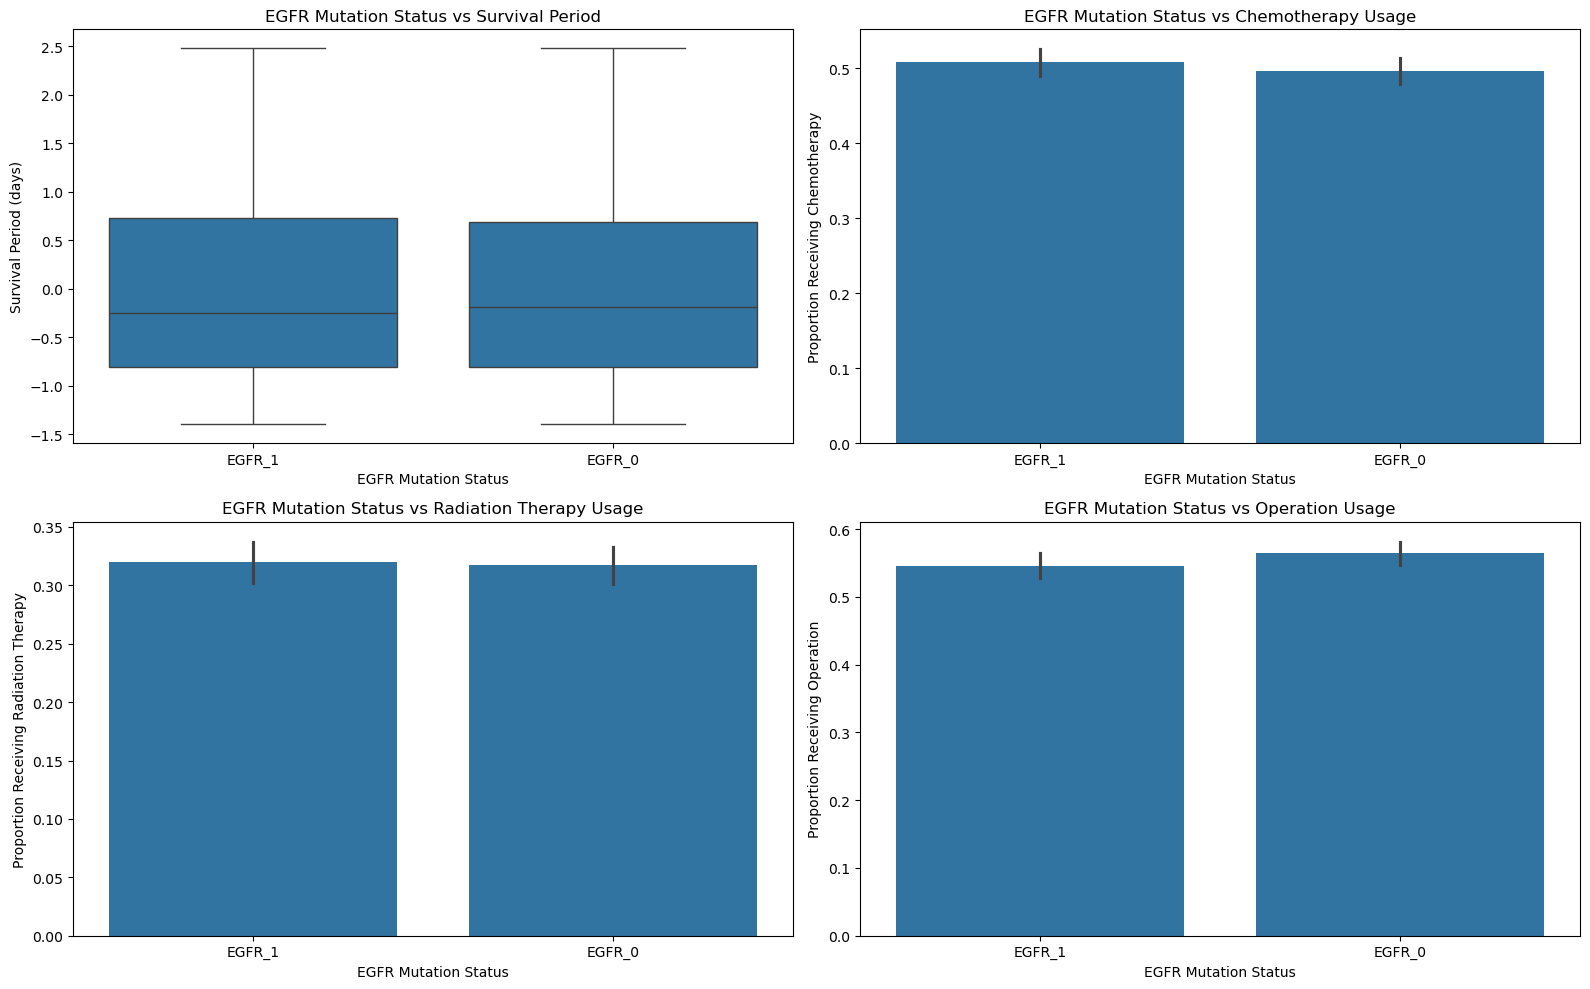

In [51]:
# EGFR 돌연변이 상태, 생존 기간, 치료 유형 간의 관계 분석
import matplotlib.pyplot as plt
import seaborn as sns

# EGFR 상태가 'EGFR_1' 또는 'EGFR_0'인 데이터 필터링
egfr_groups = df[df['EGFR_status'].isin(['EGFR_1', 'EGFR_0'])]

# EGFR 돌연변이 상태에 따른 생존 기간, 치료 유형 시각화
plt.figure(figsize=(16, 10))

# EGFR 돌연변이 상태 vs 생존 기간 (박스 플롯)
plt.subplot(2, 2, 1)
sns.boxplot(data=egfr_groups, x='EGFR_status', y='Survival_period')
plt.title('EGFR Mutation Status vs Survival Period')
plt.xlabel('EGFR Mutation Status')
plt.ylabel('Survival Period (days)')

# EGFR 돌연변이 상태 vs 화학요법 사용 여부 (막대 플롯, 비율)
plt.subplot(2, 2, 2)
sns.barplot(data=egfr_groups, x='EGFR_status', y='Chemotherapy')
plt.title('EGFR Mutation Status vs Chemotherapy Usage')
plt.xlabel('EGFR Mutation Status')
plt.ylabel('Proportion Receiving Chemotherapy')

# EGFR 돌연변이 상태 vs 방사선 치료 사용 여부 (막대 플롯, 비율)
plt.subplot(2, 2, 3)
sns.barplot(data=egfr_groups, x='EGFR_status', y='Radiation_Therapy')
plt.title('EGFR Mutation Status vs Radiation Therapy Usage')
plt.xlabel('EGFR Mutation Status')
plt.ylabel('Proportion Receiving Radiation Therapy')

# EGFR 돌연변이 상태 vs 수술 여부 (막대 플롯, 비율)
plt.subplot(2, 2, 4)
sns.barplot(data=egfr_groups, x='EGFR_status', y='Operation')
plt.title('EGFR Mutation Status vs Operation Usage')
plt.xlabel('EGFR Mutation Status')
plt.ylabel('Proportion Receiving Operation')

plt.tight_layout()
plt.show()


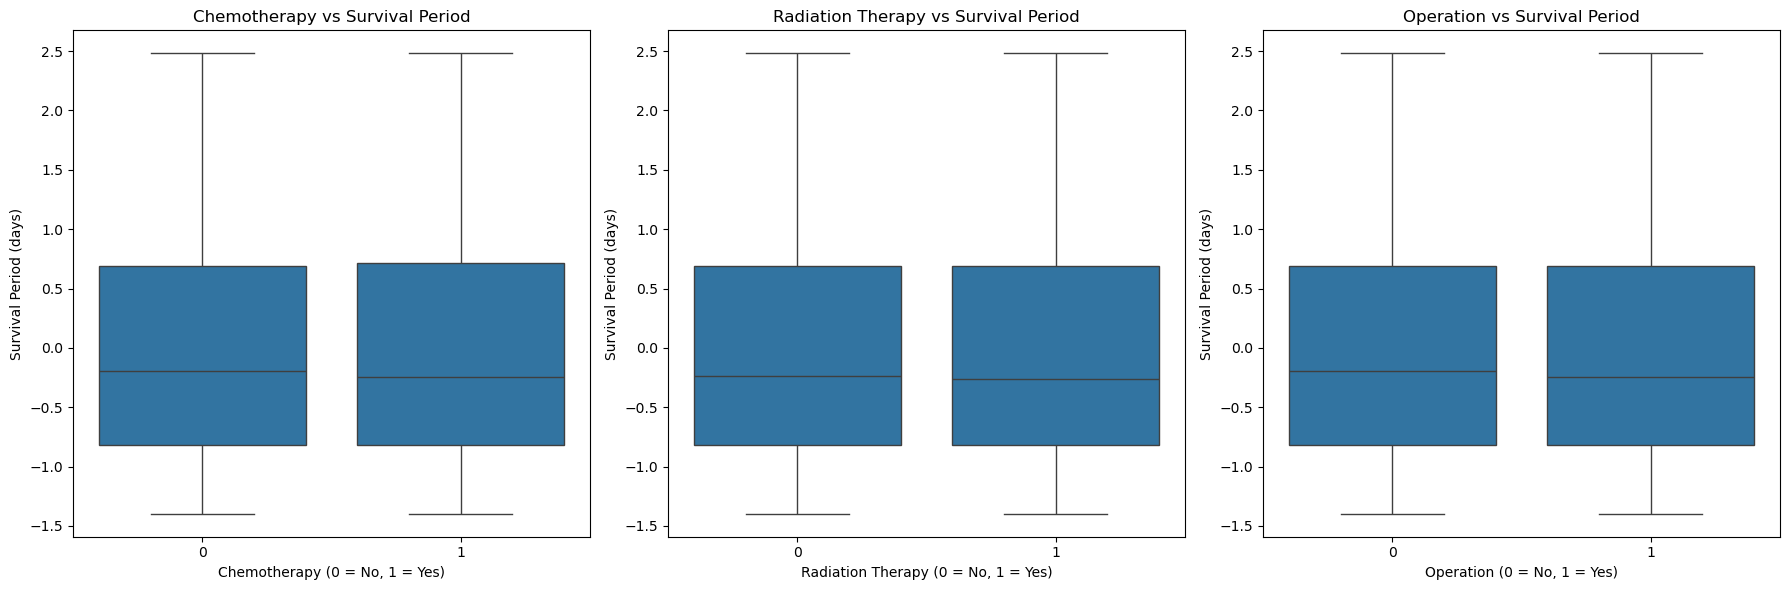

In [52]:
# 특정 치료를 받은 환자의 생존 기간 분석
# 화학요법, 방사선 치료, 수술에 초점을 맞춥니다.

plt.figure(figsize=(18, 6))

# 화학요법 vs 생존 기간
plt.subplot(1, 3, 1)
sns.boxplot(data=df, x='Chemotherapy', y='Survival_period')
plt.title('Chemotherapy vs Survival Period')
plt.xlabel('Chemotherapy (0 = No, 1 = Yes)')
plt.ylabel('Survival Period (days)')

# 방사선 치료 vs 생존 기간
plt.subplot(1, 3, 2)
sns.boxplot(data=df, x='Radiation_Therapy', y='Survival_period')
plt.title('Radiation Therapy vs Survival Period')
plt.xlabel('Radiation Therapy (0 = No, 1 = Yes)')
plt.ylabel('Survival Period (days)')

# 수술 vs 생존 기간
plt.subplot(1, 3, 3)
sns.boxplot(data=df, x='Operation', y='Survival_period')
plt.title('Operation vs Survival Period')
plt.xlabel('Operation (0 = No, 1 = Yes)')
plt.ylabel('Survival Period (days)')

plt.tight_layout()
plt.show()
